# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather = []
print('-'*30)
print("Beginning Data Retrieval")
print('-'*30)

for s in range(len(cities)):
    print(f"Processing Record {s%50+(s//50==0)} of Set {s//50+1} | {cities[s]}")
    weather.append(requests.get(f"https://api.openweathermap.org/data/2.5/weather?q={cities[s]}&units=imperial&appid={weather_api_key}").json())
    if weather[-1]["cod"]=="404":
        print("City not found. Skipping...")
        weather.pop()
    # Add a one second interval between queries to stay within API query limits
    #time.sleep(1)

print('-'*30)
print("Data Retrieval Complete")
print('-'*30)

------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | necochea
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | santa maria
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | rabo de peixe
Processing Record 11 of Set 1 | ahipara
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | tezpur
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | berlevag
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | beloha
Processing Record 21 of Set 1 | karaul


City not found. Skipping...
Processing Record 36 of Set 4 | menongue
Processing Record 37 of Set 4 | antofagasta
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | arinos
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | saint anthony
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | faya
Processing Record 45 of Set 4 | caceres
Processing Record 46 of Set 4 | galesong
Processing Record 47 of Set 4 | russell
Processing Record 48 of Set 4 | fare
Processing Record 49 of Set 4 | dharmanagar
Processing Record 0 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | butaritari
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | champasak
Processing Record 4 of Set 5 | abong mbang
Processing Record 5 of Set 5 | puerto de la cruz
Processing Record 6 of Set 5 | nokaneng
Processing Record 7 of Set 5 | kendrapara
Processing Record 8 of

Processing Record 23 of Set 8 | luderitz
Processing Record 24 of Set 8 | mount isa
Processing Record 25 of Set 8 | spirovo
Processing Record 26 of Set 8 | mrirt
City not found. Skipping...
Processing Record 27 of Set 8 | mahalapye
Processing Record 28 of Set 8 | odweyne
Processing Record 29 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 8 | airai
Processing Record 31 of Set 8 | ayan
Processing Record 32 of Set 8 | boddam
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | port augusta
Processing Record 35 of Set 8 | galway
Processing Record 36 of Set 8 | harrison
Processing Record 37 of Set 8 | diffa
Processing Record 38 of Set 8 | severnyy
Processing Record 39 of Set 8 | narrabri
Processing Record 40 of Set 8 | atikokan
Processing Record 41 of Set 8 | paradwip
City not found. Skipping...
Processing Record 42 of Set 8 | bacungan
Processing Record 43 of Set 8 | kavieng
Processing Record 44 of Set 8 | qui nhon
Processing Record 45 of Set 8 |

Processing Record 10 of Set 12 | qasigiannguit
Processing Record 11 of Set 12 | kieta
Processing Record 12 of Set 12 | kimbe
Processing Record 13 of Set 12 | naze
Processing Record 14 of Set 12 | fortuna
Processing Record 15 of Set 12 | sibolga
Processing Record 16 of Set 12 | north vanlaiphai
Processing Record 17 of Set 12 | koumac
Processing Record 18 of Set 12 | camacupa
Processing Record 19 of Set 12 | gaya
Processing Record 20 of Set 12 | touros
Processing Record 21 of Set 12 | amursk
Processing Record 22 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 23 of Set 12 | leshukonskoye
Processing Record 24 of Set 12 | batagay
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | ambatofinandrahana
Processing Record 27 of Set 12 | lixourion
Processing Record 28 of Set 12 | butterworth
Processing Record 29 of Set 12 | nhulunbuy
Processing Record 30 of Set 12 | aljezur
Processing Record 31 of Set 12 | kaeo
Processing Record 32 of Set 12 | neka
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create lists to store data
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# read weather's json responses into list variables
for x in weather:
    city.append(x["name"])
    cloudiness.append(x["clouds"]["all"])
    country.append(x["sys"]["country"])
    date.append(x["dt"])
    humidity.append(x["main"]["humidity"])
    lat.append(x["coord"]["lat"])
    lng.append(x["coord"]["lon"])
    max_temp.append(x["main"]["temp_max"])
    wind_speed.append(x["wind"]["speed"])

# create a DataFrame from weather's variables lists
weather_df = pd.DataFrame({
    "City": city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# print weather's DataFrame variablle count
weather_df.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [5]:
# Export the city data into a .csv
weather_df.to_csv(output_data_file)

In [6]:
# Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,20,EC,1584796244,94,-0.74,-90.35,78.01,5.82
1,Necochea,0,AR,1584796538,69,-38.55,-58.74,73.00,10.00
2,Constitución,100,CL,1584796252,81,-35.33,-72.42,55.31,10.13
3,Ushuaia,100,AR,1584796206,87,-54.80,-68.30,42.80,4.70
4,Hilo,90,US,1584796245,83,19.73,-155.09,71.60,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

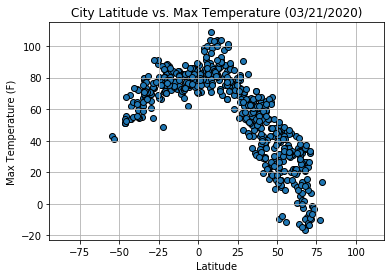

In [7]:
# store today's date to included in each plot's title
today = str(pd.Timestamp(weather_df["Date"][0], unit='s').strftime('%m/%d/%Y'))

# create a scatter plot of "latitude vs. temperature"
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor="k")

# label the "latitude vs. temperature" scatter plot
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# format the "latitude vs. temperature" scatter plot
plt.axis("equal")
plt.grid()

# save and show an image of the scatter plot
plt.savefig("output_data/plot_temperature.png")
plt.show()

This plot shows us that cities are warmer closer to the equator.

#### Latitude vs. Humidity Plot

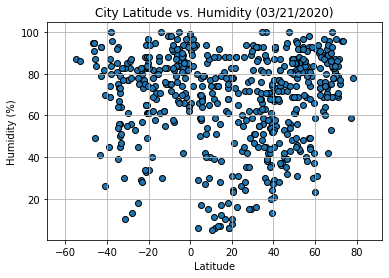

In [8]:
# create a scatter plot of "latitude vs. humidity"
plt.scatter(weather_df["Lat"], weather_df["Humidity"])

# label the "latitude vs. humidity" scatter plot
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# format the "latitude vs. humidity" scatter plot
plt.gci().set_edgecolor("k")
plt.axis("equal")
plt.grid()

# save and show an image of the scatter plot
plt.savefig("output_data/plot_humidity.png")
plt.show()

This plot shows little correlation between latitude and humidity.  
Humidity is distributed similarly regardless of latitude.

#### Latitude vs. Cloudiness Plot

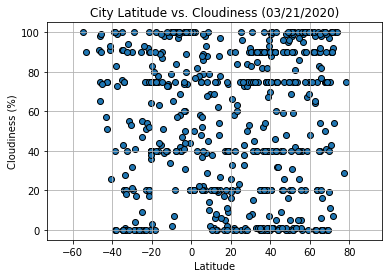

In [9]:
# create a scatter plot of "latitude vs. cloudiness"
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])

# label the "latitude vs. cloudiness" scatter plot
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# format the "latitude vs. humidity" scatter plot
plt.gci().set_edgecolor("k")
plt.axis("equal")
plt.grid()

# save and show an image of the scatter plot
plt.savefig("output_data/plot_cloudiness.png")
plt.show()

This plot shows no correlation between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

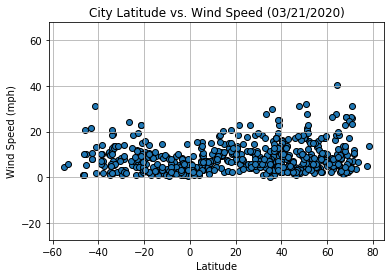

In [10]:
# create a scatter plot of "latitude vs. wind speed"
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])

# label the "latitude vs. wind speed" scatter plot
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# format the "latitude vs. wind speed" scatter plot
plt.gci().set_edgecolor("k")
plt.axis("equal")
plt.grid()

# save and show an image of the scatter plot
plt.savefig("output_data/plot_wind.png")
plt.show()

This plot shows that although there is minial correlation between latitude and  
wind speed, with the windiest cities tending to occur further from the equator.

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_r(x_values, y_values):
    # get linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # create line data
    regress_values = [slope*x+intercept for x in x_values]
    # create line equation (as a string)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot the linear regression
    plt.plot(x_values,regress_values,"r-")
    # print the linear equation on the plot
    x_loc = x_values.min() + (x_values.max() - x_values.min()) * 1 / 10
    y_loc = y_values.min() + (y_values.max() - y_values.min()) * 1 / 10
    plt.annotate(line_eq,(x_loc, y_loc),fontsize=15,color="red")
    # print rvalue
    print("the r-squared is: " + str(rvalue))
    return # end of function

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df["Lat"] >= 0]
southern_df = weather_df[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is: -0.8841443471729477


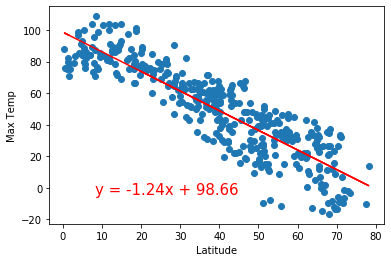

In [13]:
# create a scatter plot of "latitude vs. temperature"
plt.scatter(northern_df["Lat"], northern_df["Max Temp"])

# label the "latitude vs. temperature" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# add a linear regression to the "latitude vs. temperature" scatter plot
linear_r(northern_df["Lat"], northern_df["Max Temp"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_temperature_north.png")
plt.show()

The plot shows a negative correlation between latitude and temperature for the nothern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is: 0.6390902280968894


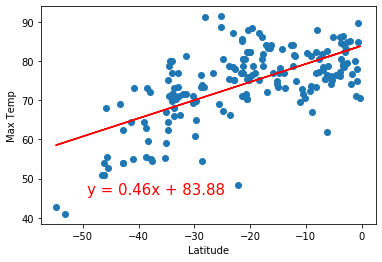

In [14]:
# create a scatter plot of "latitude vs. temperature"
plt.scatter(southern_df["Lat"], southern_df["Max Temp"])

# label the "latitude vs. temperature" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# add a linear regression to the "latitude vs. temperature" scatter plot
linear_r(southern_df["Lat"], southern_df["Max Temp"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_temperature_south.png")
plt.show()

The plot shows a positive correlation between latitude and temperature for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is: 0.27561941285728947


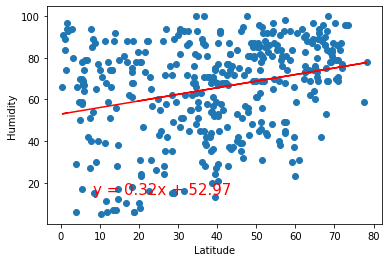

In [15]:
# create a scatter plot of "latitude vs. humidity"
plt.scatter(northern_df["Lat"], northern_df["Humidity"])

# label the "latitude vs. humidity" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# add a linear regression to the "latitude vs. humidity" scatter plot
linear_r(northern_df["Lat"], northern_df["Humidity"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_humidity_northern.png")
plt.show()

The plot shows a slight positive correlation between latitude and humidity for the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is: 0.16117140046950004


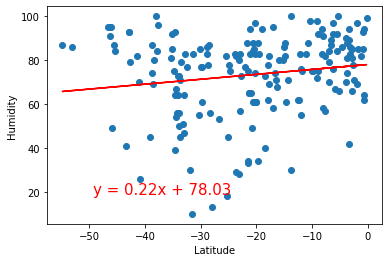

In [16]:
# create a scatter plot of "latitude vs. humidity"
plt.scatter(southern_df["Lat"], southern_df["Humidity"])

# label the "latitude vs. humidity" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# add a linear regression to the "latitude vs. humidity" scatter plot
linear_r(southern_df["Lat"], southern_df["Humidity"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_humidity_southern.png")
plt.show()

The plot shows a slight positive correlation between latitude and humidity for the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is: 0.16428284281302727


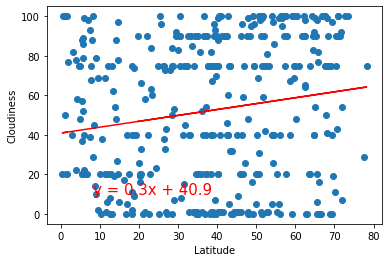

In [17]:
# create a scatter plot of "latitude vs. cloudiness"
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"])

# label the "latitude vs. cloudiness" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# add a linear regression to the "latitude vs. cloudiness" scatter plot
linear_r(northern_df["Lat"], northern_df["Cloudiness"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_cloudiness_northern.png")
plt.show()

The plot shows little correlation between latitude and cloudiness for the northern hemishpere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is: 0.17523290668051242


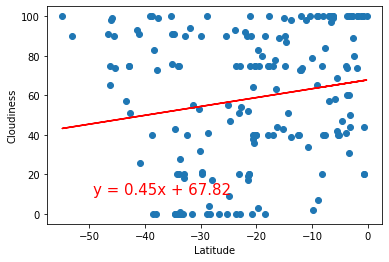

In [18]:
# create a scatter plot of "latitude vs. cloudiness"
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"])

# label the "latitude vs. cloudiness" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# add a linear regression to the "latitude vs. cloudiness" scatter plot
linear_r(southern_df["Lat"], southern_df["Cloudiness"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_cloudiness_southern.png")
plt.show()

The plot shows little correlation between latitude and cloudiness for the southern hemishpere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is: 0.1424489992788358


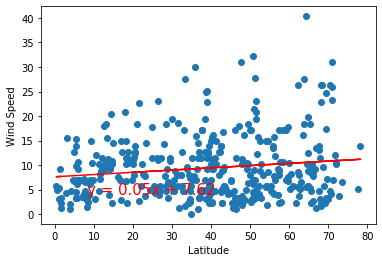

In [19]:
# create a scatter plot of "latitude vs. wind speed"
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"])

# label the "latitude vs. wind speed" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# add a linear regression to the "latitude vs. wind speed" scatter plot
linear_r(northern_df["Lat"], northern_df["Wind Speed"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_wind_northern.png")
plt.show()

The plot shows a slight positive correlation between latitude and wind speed for the northern hemishpere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is: -0.30483236701061794


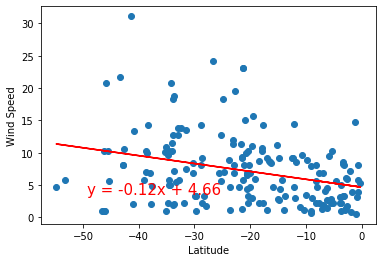

In [20]:
# create a scatter plot of "latitude vs. wind speed"
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"])

# label the "latitude vs. wind speed" scatter plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# add a linear regression to the "latitude vs. wind speed" scatter plot
linear_r(southern_df["Lat"], southern_df["Wind Speed"])

# save and show an image of the scatter plot
plt.savefig("output_data/plot_wind_southern.png")
plt.show()

The plot shows a slight negative correlation between latitude and wind speed for the northern hemishpere.